In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [35]:
df = pd.read_csv("C:/Users/User/Desktop/weather-check.csv")

In [36]:
df.head()

,RespondentID,weather_check,general_tool,specific_tool,age,gender,income,US Region,likelihood
0,3887201482,Yes,The default weather app on your phone,-,30 - 44,Male,"$50,000 to $74,999",South Atlantic,Very likely
1,3887159451,Yes,The default weather app on your phone,-,18 - 29,Male,Prefer not to answer,-,Very likely
2,3887152228,Yes,The default weather app on your phone,-,30 - 44,Male,"$100,000 to $124,999",Middle Atlantic,Very likely
3,3887145426,Yes,The default weather app on your phone,-,30 - 44,Male,Prefer not to answer,-,Somewhat likely
4,3887021873,Yes,A specific website or app (please provide the ...,Iphone app,30 - 44,Male,"$150,000 to $174,999",Middle Atlantic,Very likely


In [37]:
df.shape

(928, 9)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RespondentID   928 non-null    int64 
 1   weather_check  928 non-null    object
 2   general_tool   928 non-null    object
 3   specific_tool  928 non-null    object
 4   age            928 non-null    object
 5   gender         928 non-null    object
 6   income         928 non-null    object
 7   US Region      928 non-null    object
 8   likelihood     928 non-null    object
dtypes: int64(1), object(8)
memory usage: 65.4+ KB


In [39]:
df['RespondentID'] = df['RespondentID'].astype('O')

In [40]:
df.describe()

,RespondentID,weather_check,general_tool,specific_tool,age,gender,income,US Region,likelihood
count,928,928,928,928,928,928,928,928,928
unique,928,2,9,122,5,3,12,10,5
top,3879934990,Yes,The default weather app on your phone,-,45 - 59,Female,Prefer not to answer,Pacific,Very likely
freq,1,746,213,753,278,527,169,185,362


In [41]:
df.isnull().sum()

RespondentID     0
weather_check    0
general_tool     0
specific_tool    0
age              0
gender           0
income           0
US Region        0
likelihood       0
dtype: int64

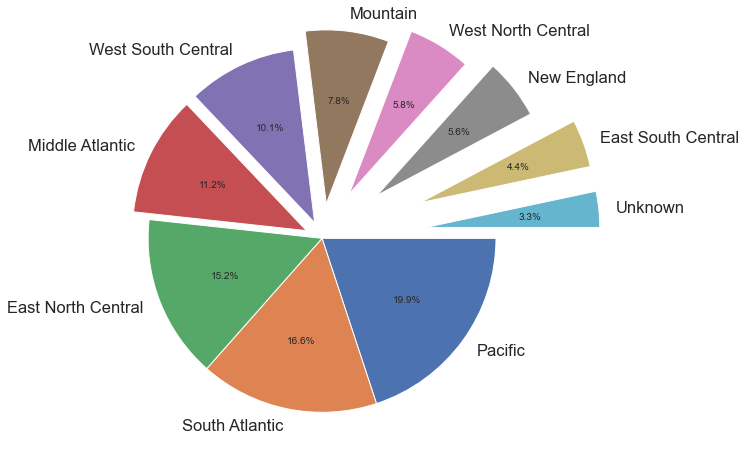

In [42]:
plt.subplots(figsize=[10, 8])
df['US Region']=df['US Region'].replace(['-'],'Unknown')
explode = (0, 0, 0,0.1,0.1,0.2,0.3,0.4,0.6,0.6)
counts = df['US Region'].value_counts()
sizes = counts.values.tolist()
plt.pie(sizes,labels=counts.index, explode = explode,  counterclock=False, autopct='%1.1f%%')
plt.show()

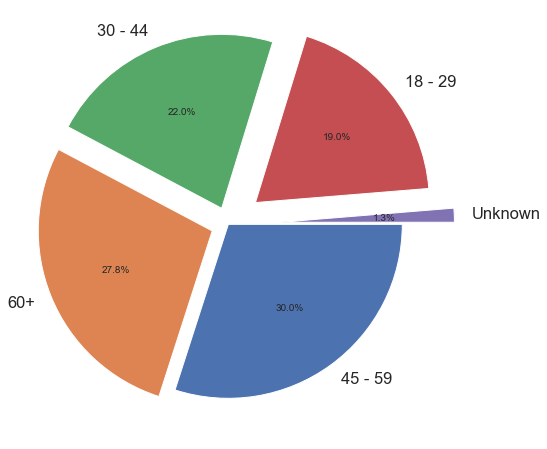

In [43]:
df['age']=df['age'].replace(['-'],'Unknown')
explode = (0, 0.1, 0.1, 0.2, 0.3)
pie, ax = plt.subplots(figsize=[10, 8])
counts = df['age'].value_counts()
sizes = counts.values.tolist()
plt.pie(sizes,labels=counts.index,explode = explode, counterclock=False, autopct='%1.1f%%')
plt.show()

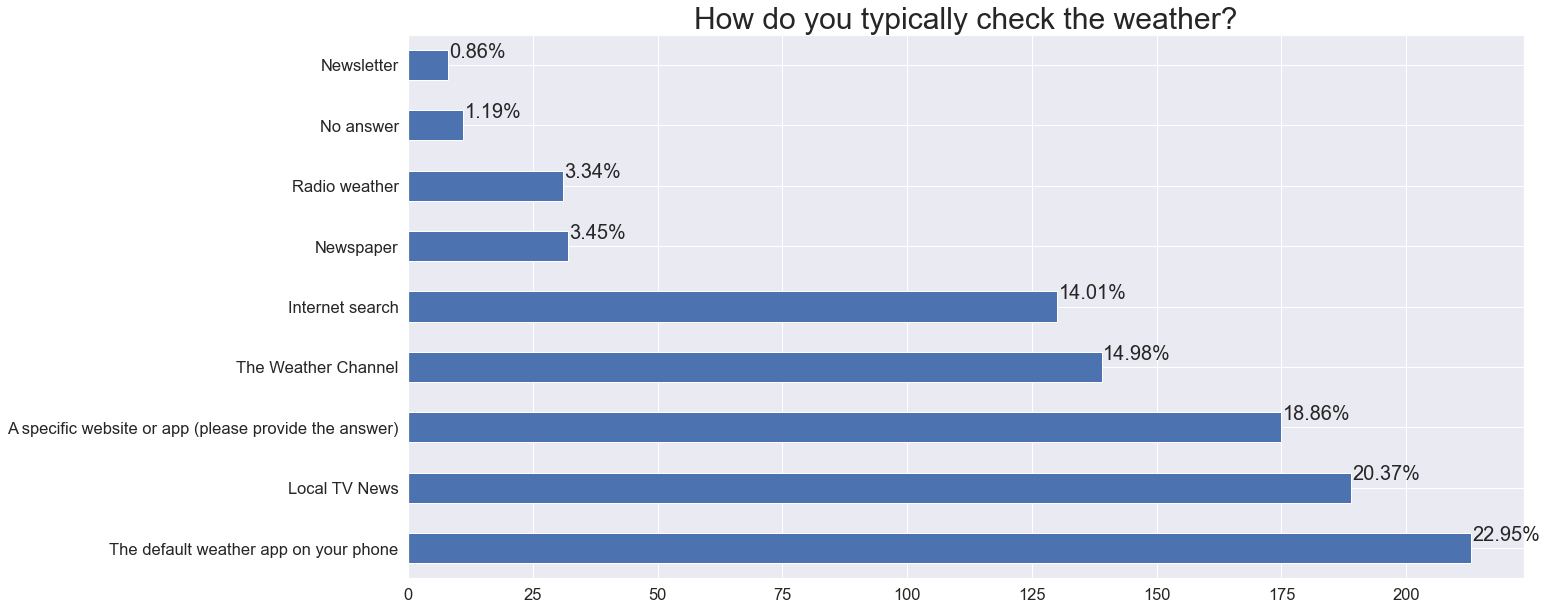

In [45]:
df['general_tool']=df['general_tool'].replace(['-'],'No answer')
plt.figure(figsize = (20,10))
plt.title("How do you typically check the weather?", size = 30)
ax = df["general_tool"].value_counts().plot.barh()
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=20)

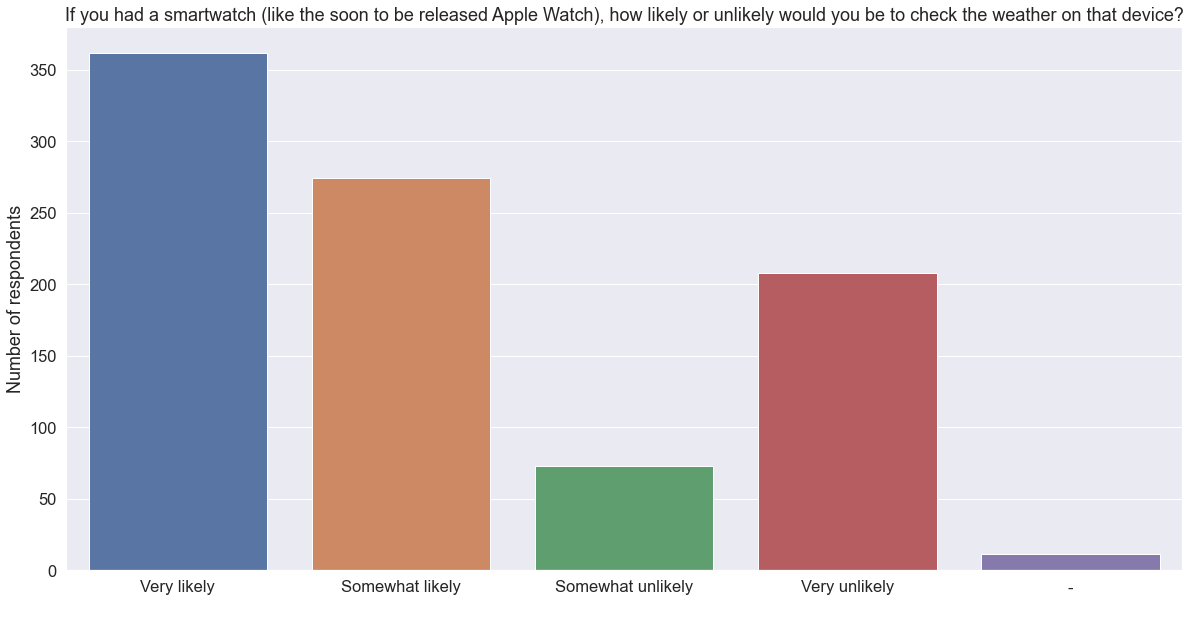

In [46]:
plt.figure(figsize=(20, 10))
fig = plt.title('If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?')
category_order = ['Very likely', 'Somewhat likely', 'Somewhat unlikely', 'Very unlikely', '-']
sns.countplot(x="likelihood" , data= df, order = category_order)
sns.set_theme(style="darkgrid")
plt.xlabel(' ')
plt.ylabel('Number of respondents')
sns.set(font_scale = 2)
plt.show()

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


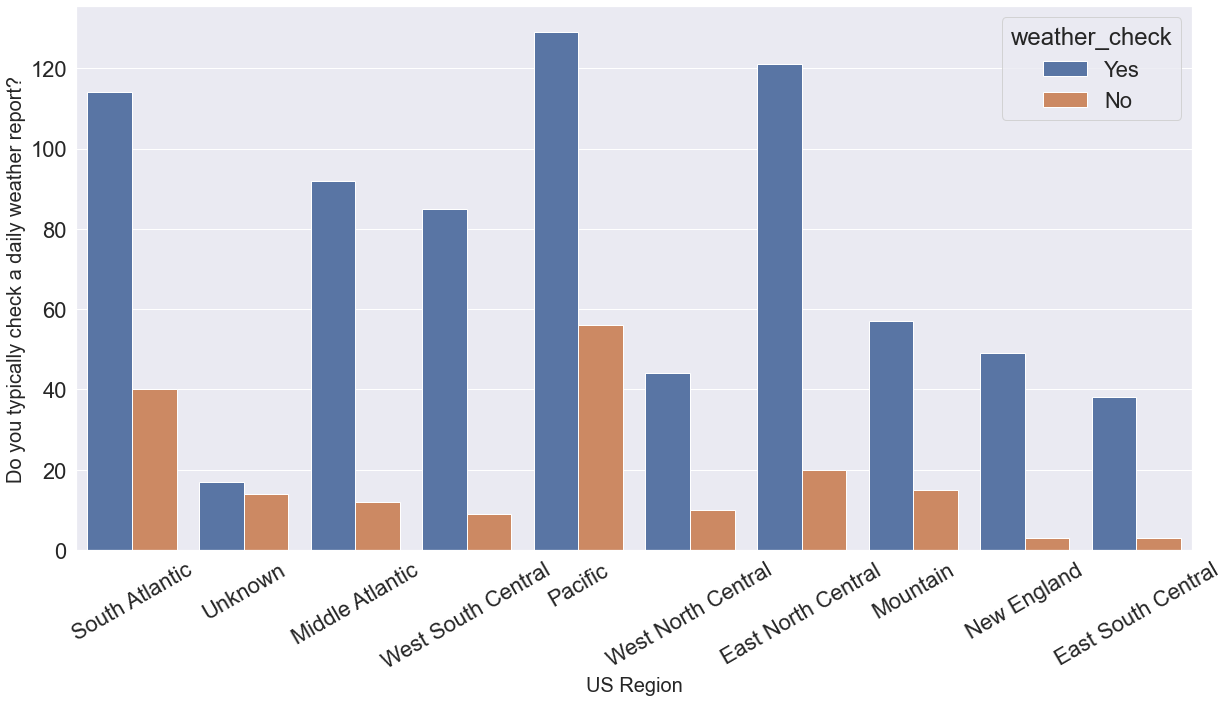

In [20]:
plt.figure(figsize=(20, 10))
ax = sns.countplot(df["US Region"],hue=df["weather_check"],data= df)
plt.xlabel("US Region", size = 20)
plt.ylabel("Do you typically check a daily weather report?", size = 20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.show()

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


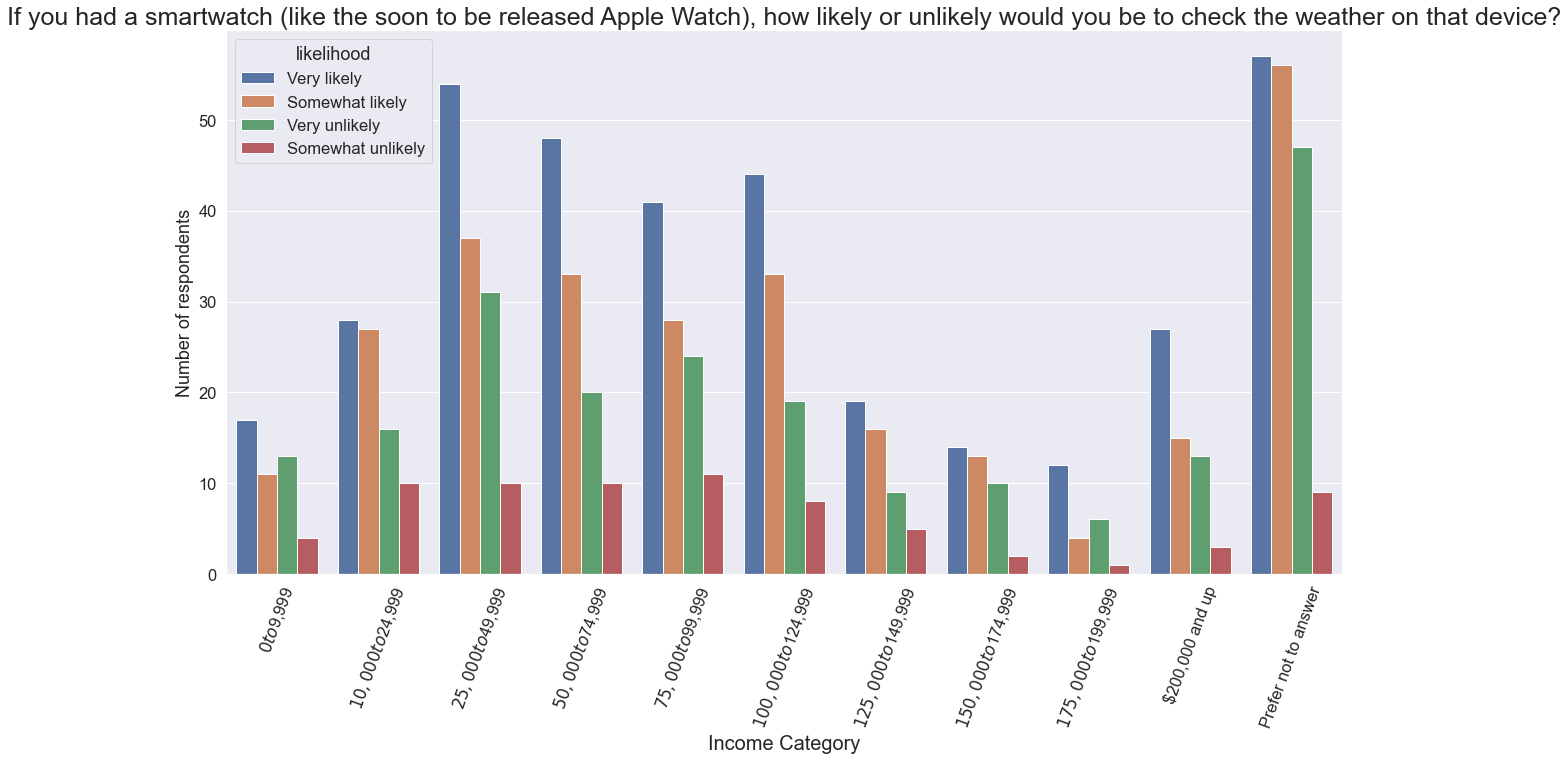

In [21]:
df = df.replace("-", np.NaN)
plt.figure(figsize=(20, 10))
sns.set(font_scale = 1.5)
ax = sns.countplot(df["income"],hue=df["likelihood"], order = ['$0 to $9,999', '$10,000 to $24,999', '$25,000 to $49,999', '$50,000 to $74,999', '$75,000 to $99,999', '$100,000 to $124,999', '$125,000 to $149,999', '$150,000 to $174,999', '$175,000 to $199,999', '$200,000 and up', 'Prefer not to answer'], data= df)
plt.xlabel("Income Category", size = 20)
plt.ylabel('Number of respondents')
plt.title("If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?", size = 25 )
ax.set_xticklabels(ax.get_xticklabels(), rotation=70)
plt.show()

<Figure size 1800x1800 with 0 Axes>

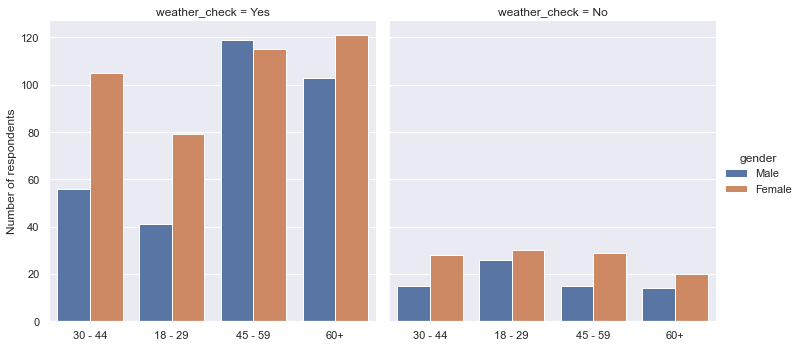

In [77]:
df['age'] = df['age'].replace("Unknown", np.NaN)
sns.set(font_scale = 1)
plt.figure(figsize=(25, 25))
g = sns.catplot(x="age", hue="gender", col="weather_check",data=df, kind="count")
(g.set_axis_labels("", "Number of respondents"))

<Figure size 1800x1800 with 0 Axes>

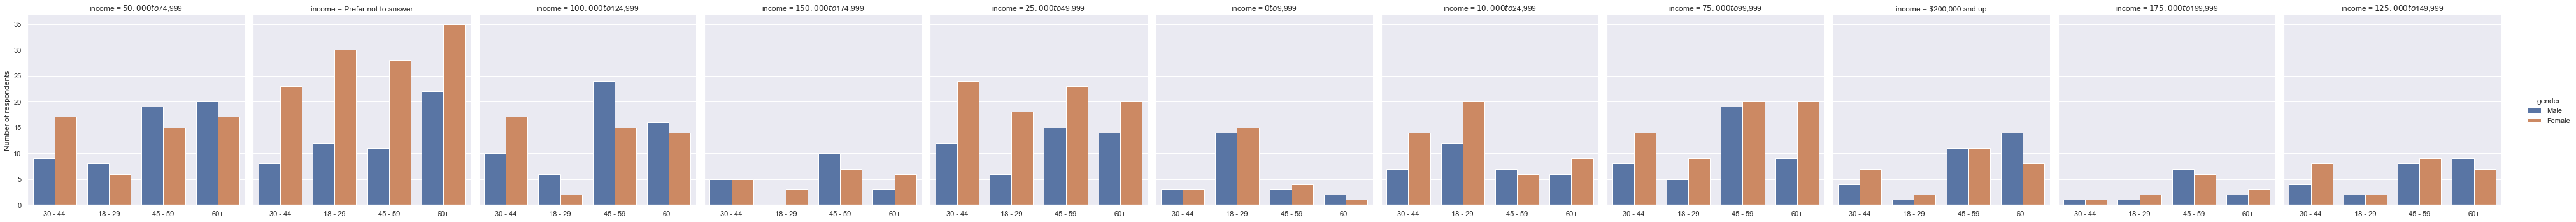

In [80]:
df['age'] = df['age'].replace("Unknown", np.NaN)
sns.set(font_scale = 1)
plt.figure(figsize=(25, 25))
g = sns.catplot(x="age", hue="gender", col="income",data=df, kind="count")
(g.set_axis_labels("", "Number of respondents"))